In [8]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import random

In [9]:
from python.WGraD.tools import *
from python.WGraD.WGraD import WGraD, ClusterResult
from python.fitness.cec2013.cec2013.cec2013 import CEC2013

In [10]:
f = CEC2013(1)
fitness_func = f.evaluate
dimension = f.get_dimension()

lb = f.get_lbound(dimension - 1)
ub = f.get_ubound(dimension - 1)


num_samples = 100

plot test function

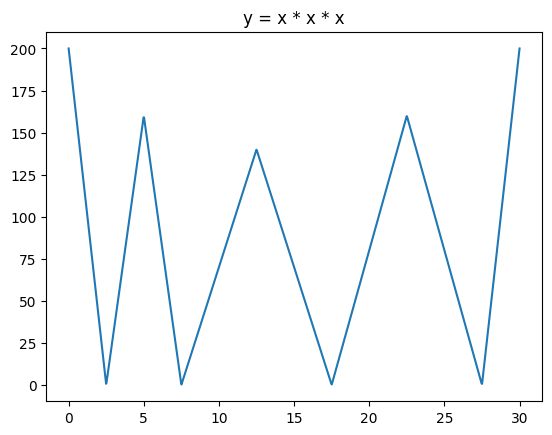

In [11]:
n = 1000
X_1 = np.linspace(lb, ub, n).reshape((n, dimension))
Y_1 = np.zeros((n, 1))
for i in range(n):
    Y_1[i] = fitness_func(X_1[i])
plt.title("y = x * x * x")
plt.plot(X_1, Y_1)

random sample

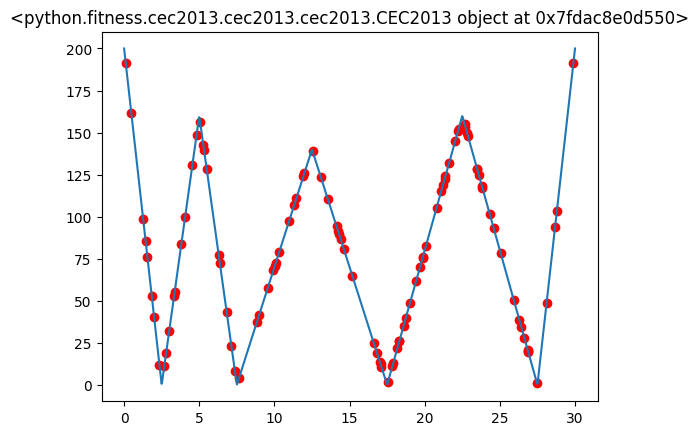

In [12]:
X_2 = lb + np.random.rand(num_samples, dimension) * (ub - lb)
Y_2 = np.zeros((num_samples, 1))
for i in range(num_samples):
    Y_2[i] = fitness_func(X_2[i])

plt.title(f"{f}")
plt.plot(X_1, Y_1)
plt.scatter(X_2, Y_2, marker="o", color = "red")

In [13]:
wgrad = WGraD(X_2, Y_2, fitness_func=fitness_func)
cluster_result = wgrad.WGrad_2()
cluster_result

[<Cluster Result> 1 dimension 47 samples,
 <Cluster Result> 1 dimension 53 samples]

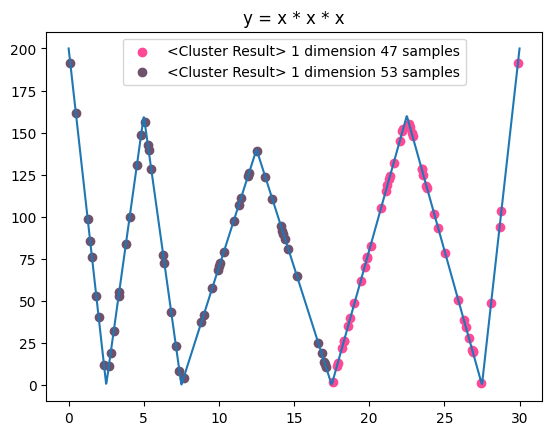

In [14]:
plt.title("y = x * x * x")
plt.plot(X_1, Y_1)

for cluster in cluster_result:
    color = '#%02x%02x%02x' % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    plt.scatter(cluster.X, cluster.fitness, marker="o", color = color, label = cluster)
plt.legend()